In [1]:
import numpy as np #lib para usar vetores
import pandas as pd #lib para usar dataframes ("planilhas de excel")
import seaborn as sns #lib para criar gráficos mais "bonitos" que o matplotlib
import matplotlib.pyplot as plt #lib para criar gráficos "comuns" do estilo matlab
import google #lib para poder usar no google colab

In [38]:
#importando o arquivo de dados
customers = pd.read_csv('../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')

In [39]:
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**Descrição do dataset**

* ***CustomerId***: Identificação única do cliente
* ***Gender***: Gênero do cliente
* ***Age***: Idade do cliente
* ***Annual Income***: Renda anual do cliente
* ***Spendig Score (1-100)***: Pontuação atribuida pelo shopping com base no gasto do cliente

In [40]:
#verificando a existência de campos nulos
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
#outra maneira de verificar se o dataset tem campos nulos
customers.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [12]:
#adicionando valores nulos para poder ver as trativas
customers_null = customers
for col in customers_null.columns:
    customers_null.loc[customers_null.sample(frac=0.1).index,col] = np.nan #frac é o percentual dos dados (0.1 [10%] de 200 = 20 linhas)

In [13]:
customers_null.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              180 non-null    float64
 1   Gender                  180 non-null    object 
 2   Age                     180 non-null    float64
 3   Annual Income (k$)      180 non-null    float64
 4   Spending Score (1-100)  180 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.9+ KB


In [14]:
customers_null.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,Male,19.0,15.0,39.0
1,2.0,Male,21.0,15.0,81.0
2,3.0,Female,NaN,16.0,6.0
3,4.0,Female,23.0,NaN,77.0
4,5.0,NaN,31.0,17.0,40.0


In [35]:
customers_null.isnull().sum()

CustomerID                20
Gender                    20
Age                       20
Annual Income (k$)        20
Spending Score (1-100)    20
dtype: int64

<h3>Algumas maneiras de tratar os valores nulos:</h3>

1. Usando a função dropna(), que deleta da sua base as linhas que contêm algum valor nulo
2. Usando a função fillna(), que insere valores no campo vazio

Importante lembrar que usando o dropna(), a linha é deletada do dataset e isso pode causar um impacto considerável nele caso ele seja pequeno. Dessa forma, é importante avaliar se o dropna() não vai reduzir muito o tamanho do dataset.

Lembrando também que essas funções não alteram definitivamente o dataset.

In [16]:
#testando o dropna()
customers_null.dropna()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,Male,19.0,15.0,39.0
1,2.0,Male,21.0,15.0,81.0
5,6.0,Female,22.0,17.0,76.0
6,7.0,Female,35.0,18.0,6.0
7,8.0,Female,23.0,18.0,94.0
...,...,...,...,...,...
191,192.0,Female,32.0,103.0,69.0
193,194.0,Female,38.0,113.0,91.0
194,195.0,Female,47.0,120.0,16.0
195,196.0,Female,35.0,120.0,79.0


Usando a função dropna() vimos que o nosso dataset teve 87 linhas apagadas, ou seja, que continham algum valor NaN.
Dessa forma, acabamos perdendo 43% dos nossos dados, e provando assim que o dropna() não é a melhor maneira de tratar valores nulos desse dataset.

In [19]:
#testando a função fillna(), colocando 0
customers_null.fillna(0)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,Male,19.0,15.0,39.0
1,2.0,Male,21.0,15.0,81.0
2,3.0,Female,0.0,16.0,6.0
3,4.0,Female,23.0,0.0,77.0
4,5.0,0,31.0,17.0,40.0
...,...,...,...,...,...
195,196.0,Female,35.0,120.0,79.0
196,197.0,Female,45.0,126.0,28.0
197,198.0,Male,32.0,0.0,74.0
198,0.0,Male,32.0,137.0,18.0


In [20]:
#encontrando valores de estatística do dataset

customers_null.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,180.000000,180.000000,180.000000,180.000000
mean,98.100000,38.994444,60.416667,50.344444
std,57.258221,14.005385,26.164899,26.507156
min,1.000000,18.000000,15.000000,1.000000
25%,48.750000,29.000000,41.500000,33.500000
50%,97.500000,36.000000,60.500000,50.000000
75%,146.250000,49.000000,78.000000,73.000000
max,198.000000,70.000000,137.000000,99.000000


Outra técnica interessante da tratativa de valores nulos é com o preenchimento da média de cada coluna, apenas para tipos ***numéricos***, ou seja, campos do tipo object não serão preenchidos.

In [36]:
customers_null.fillna(customers_null.mean())

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,Male,19.000000,15.000000,39.0
1,2.0,Male,21.000000,15.000000,81.0
2,3.0,Female,38.994444,16.000000,6.0
3,4.0,Female,23.000000,60.416667,77.0
4,5.0,NaN,31.000000,17.000000,40.0
...,...,...,...,...,...
195,196.0,Female,35.000000,120.000000,79.0
196,197.0,Female,45.000000,126.000000,28.0
197,198.0,Male,32.000000,60.416667,74.0
198,98.1,Male,32.000000,137.000000,18.0


<h3>Algumas maneiras de identificar anomalias (outliers):</h3>

* Uma das forma mais simples de encontrar outliers é através da visualização gráfica do boxplot.
* Outra forma é através do Z-Score, que encontra a média e desvio padrão e valores que tem entre 2 ou 3 desvios padrões estão dentro da normalidade, onde mais com isso, é possível que tenhamos um outlier.

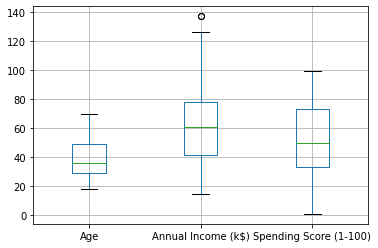

In [24]:
#usando o boxplot com as colunas desejadas
boxplot = customers.boxplot(column=['Age','Annual Income (k$)','Spending Score (1-100)'])

In [26]:
#usando o Z-Score
from scipy import stats
# a função está buscando a quantidade de desvios padrões na variavel considerando a curva Z normal
z = np.abs(stats.zscore(customers['Annual Income (k$)'].values)) #usando a variavel que achamos que tem o outlier, visto no boxplot
threshold = 2 #numero de desvio padrão aceitavel em valores normais
result = np.where(z > threshold)

df_salario_outlier = customers.iloc[result[0]]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in greater
  


In [27]:
df_salario_outlier

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)


Usando o Z-Score, podemos ver que nenhum outlier foi retornado.
Dessa maneira, tiramos a contraprova de que o bloxplot retornou (que existe um possível outlier).

<h3> Explorando os dados e entendendo alguns relacionamentos e comportamentos dos clientes.

Text(0.5, 1.0, 'Distribuição dos clientes por Gênero')

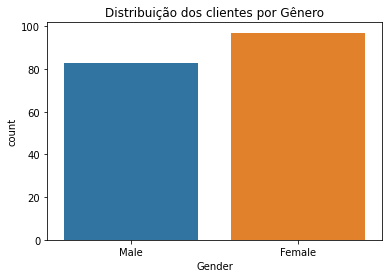

In [28]:
#analisando a distribuição dos clientes por gênero

sns.countplot(x='Gender',data=customers);
plt.title('Distribuição dos clientes por Gênero')

Text(0.5, 0, 'Idade')

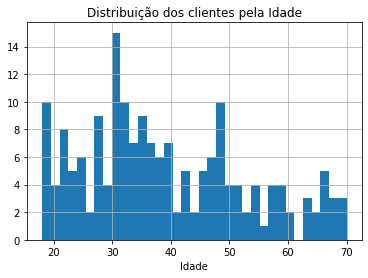

In [31]:
#analisando a distribuição dos consumidores por idade através de um histograma
customers.hist('Age',bins=35) #"bins" são as qtdes de grupos que vamos dividir os dados, ou seja, em 35 grupos
plt.title('Distribuição dos clientes pela Idade')
plt.xlabel('Idade')

Depois de realizar a exploração dos dados de forma gráfica, é interessante transformar os valores categóricos em numéricos, pois os modelos funcionam melhor com valores.

Nesse datatset, a única variável categórica que temos é o gênero e vamos transformá-la para numérica (tipo int).

Uma forma de realizar essa tratativa, é aplicando o ***replace_map***, que faz o mapeamento da variavél categórica e substitui pela valor numérico informado.

Outra forma é o label encoding (pelos Pandas e pelo Scikit Learning), que coloca os valores 0 e 1.
Vale lembrar que após colocar os códigos, é importante fazer o ***One Hot Encoding***, que transforma os valores em variáveis dummy. Isso é necessário pois como os códigos estão como 0 e 1, o modelo pode atribuir que o valor 1 tenha maior relevância do que o valor 0.

In [41]:
#copiando as colunas que são do tipo categórica para outro dataset

cat_df_customers = customers.select_dtypes(include = ['object'])

In [42]:
cat_df_customers.head()

,Gender
0,Male
1,Male
2,Female
3,Female
4,Female


In [44]:
#aplicando o mapeamento

replace_map = {'Gender': {'Male':1,'Female':2}} #criando um dicionário com os valores a sere usados no map
labels = cat_df_customers['Gender'].astype('category').cat.categories.tolist() #encontra a lista de variáveis categóricas
replace_map_comp = {'Gender': {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}} #define o mapeamento

print(replace_map_comp)

{'Gender': {'Female': 1, 'Male': 2}}


In [45]:
#fazendo a cópia do dataset

cat_df_customers_replace = pd.read_csv('../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')

In [46]:
cat_df_customers_replace.replace(replace_map_comp,inplace = True) #aplica o mapeamento
cat_df_customers_replace.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,2,19,15,39
1,2,2,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


In [48]:
#aplicando o label enconding (usando o pandas)

cat_df_customers_le = customers

In [51]:
cat_df_customers_le['Gender']=pd.Categorical(cat_df_customers_le['Gender']) #dizendo que a coluna de gênero é do tripo categorico
cat_df_customers_le.dtypes

CustomerID                   int64
Gender                    category
Age                          int64
Annual Income (k$)           int64
Spending Score (1-100)       int64
dtype: object

In [52]:
cat_df_customers_le['Gender'] = cat_df_customers_le['Gender'].cat.codes #aplicando a função que transforma as categorias em 0 e 1
cat_df_customers_le.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [54]:
#aplicando o label encoding usando o Scikit Learning

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()  #estanciando o objeto

In [55]:
#aplicando a codificação para as colunas categóricas

customers_label = pd.read_csv('../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
customers_label['Gender'] = le.fit_transform(customers_label['Gender'])
customers_label.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
5,6,0,22,17,76
6,7,0,35,18,6
7,8,0,23,18,94
8,9,1,64,19,3
9,10,0,30,19,72


In [58]:
#aplicando o One Hot Enconding (Pandas)

customers_one_hot = pd.read_csv('../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
customers_one_hot = pd.get_dummies(customers_one_hot)
customers_one_hot.head(10)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0
5,6,22,17,76,1,0
6,7,35,18,6,1,0
7,8,23,18,94,1,0
8,9,64,19,3,0,1
9,10,30,19,72,1,0


In [63]:
#aplicando o One Hot Encoder (Scikit Leraning)

customers = pd.read_csv('../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')

customers_one_hot = customers
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder() #instanciando o objeto

In [64]:
customers_ohe = ohe.fit_transform(customers_one_hot['Gender'].values.reshape(-1,1)).toarray() #retornando um array numpy
customers_ohe.shape

(200, 2)

In [65]:
customers_ohe

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.